# Analisis de Datos del Grupo I
## **Universidad Nacional de Jujuy  y Universidad de Moron**

En esta notebook se abordara el análisis de los datos extraídos durante el proceso de ETL, con el objetivo de proporcionar un marco para que el **Consejo Nacional de Calidad de la Educación** pueda crear una estrategía de estimulación de carreras, utilizando como base análisis de las diferentes poblaciones de estudiantes.

**Los objetivos de este análisis son:**
  - Realizar un análisis exploratorio de las universidades de este grupo
  - Realizar una análisis descriptivo
  - Obtener datos relevantes, comunmente conocidos como insights
  - Concluir los aspectos más importantes del dataset

# Configuraciones

En esta sección configuramos todo lo necesario para el análisis, desde las librerías utilizadas hasta los colores elegidos para realizar los gráficos y las propiedades escenciales de cada uno, para así mantener una consistencia.

In [123]:
#Realizamos los imports necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

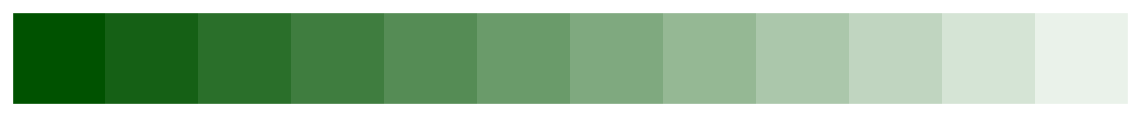

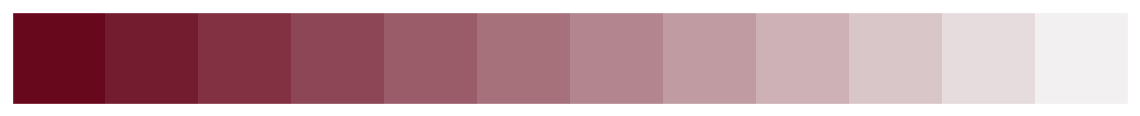

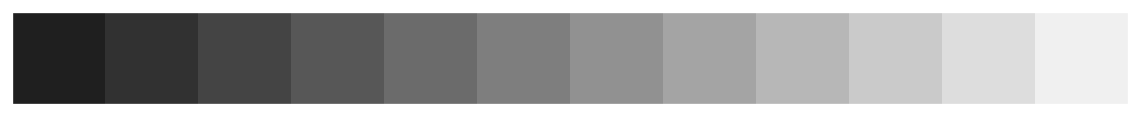

In [124]:
plt.rcParams['figure.dpi'] = 120
plt.rcParams['legend.frameon'] = False

sns.set_style('dark')
colors_green = sns.light_palette("#005200", input='rgb',n_colors=12)[::-1]
colors_red = sns.light_palette("#68081C", input='rgb',n_colors=12)[::-1]
colors_dark = sns.light_palette("#1F1F1F", input='rgb',n_colors=12)[::-1]

sns.palplot(colors_green)
sns.palplot(colors_red)
sns.palplot(colors_dark)

# Importaciones de los datos

En esta sección **importamos los datasets transformados** y además datos externos de la base de datos geonames para extraer las provincias de los alumnos, con el fin de realizar un análisis más profundo respecto a la **variable geográfica**.

In [125]:
#Colocamos el nombre de las universidades en dos variables
#Para una futura reutilización del codigo

university1 = 'GrupoI_Jujuy2'
university1_name = 'Universidad Nacional De Jujuy'

university2 = 'GrupoI_Moron2'
university2_name = 'Universidad De Moron'

df_1 = pd.read_csv(f'../../datasets/{university1}_process.txt', sep='\t')
df_2 = pd.read_csv(f'../../datasets/{university2}_process.txt', sep='\t')
df_geonames = pd.read_csv('../AR_geonames.txt', sep='\t', header=None)


# Primer acercamiento, correcciones y transformaciones adicionales

En esta sección vemos los aspectos fundamentales de los datos a trabajar, hacemos algunas correcciones y expandimos los datos

In [126]:
#imprimimos las columnas
df_1.columns 

Index(['university', 'career', 'inscription_date', 'first_name', 'last_name',
       'gender', 'age', 'location', 'email', 'postal_code'],
      dtype='object')

In [127]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4215 entries, 0 to 4214
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   university        4215 non-null   object
 1   career            4215 non-null   object
 2   inscription_date  4215 non-null   object
 3   first_name        4203 non-null   object
 4   last_name         4203 non-null   object
 5   gender            4215 non-null   object
 6   age               4215 non-null   int64 
 7   location          4215 non-null   object
 8   email             4215 non-null   object
 9   postal_code       4215 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 329.4+ KB


In [128]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1347 entries, 0 to 1346
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   university        1347 non-null   object
 1   career            1347 non-null   object
 2   inscription_date  1347 non-null   object
 3   first_name        1347 non-null   object
 4   last_name         1347 non-null   object
 5   gender            1347 non-null   object
 6   age               1347 non-null   int64 
 7   postal_code       1347 non-null   int64 
 8   location          1347 non-null   object
 9   email             1347 non-null   object
dtypes: int64(2), object(8)
memory usage: 105.4+ KB


In [129]:
print(f'La cantida de carreras en la {university1_name} es de:',len(df_1.career.unique()))
print(f'La cantida de carreras en la {university2_name} es de:',len(df_1.career.unique()))

La cantida de carreras en la Universidad Nacional De Jujuy es de: 33
La cantida de carreras en la Universidad De Moron es de: 33


In [130]:
df_1.describe()

,age,postal_code
count,4215.000000,4215.000000
mean,58.259075,4790.442705
std,33.408572,2143.610127
min,1.000000,1601.000000
25%,29.000000,3070.500000
50%,58.000000,4612.000000
75%,87.000000,6436.000000
max,117.000000,9421.000000


In [131]:
df_2.describe()

,age,postal_code
count,1347.000000,1347.000000
mean,59.266518,4769.752042
std,23.737753,2204.142382
min,18.000000,1601.000000
25%,39.000000,2914.500000
50%,60.000000,4632.000000
75%,79.000000,6467.000000
max,100.000000,9411.000000


Las únicas variables númericas dentro del dataset es la edad y el código postal, aunque este último más bien debería considerarse como categórica. Por lo tanto gráficamos como se vería la distribución de los valores de edad.

Text(0, 0.5, 'Cantidad')

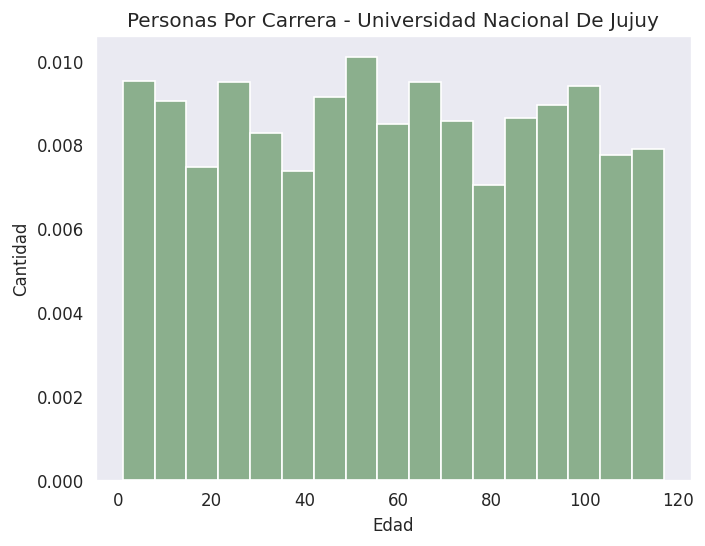

In [132]:
sns.histplot(df_1.age, color=colors_green[5],stat='density')
plt.title(f'Personas por carrera - {university1_name}'.title())
plt.xlabel('Edad')
plt.ylabel('Cantidad')

Text(0, 0.5, 'Cantidad')

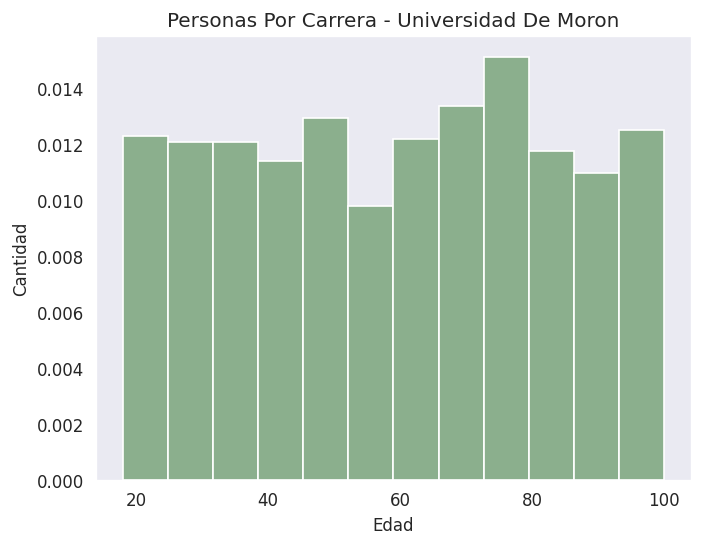

In [133]:
sns.histplot(df_2.age, color=colors_green[5],stat='density')
plt.title(f'Personas por carrera - {university2_name}'.title())
plt.xlabel('Edad')
plt.ylabel('Cantidad')

Como vemos que las edades tienen valores que no son coherentes, como serían alumnos menores de 15 años y mayores de 85, siendo que la edad de ingreso a la universidad usualmente es de 17-18 años y siendo que la esperanza de vida de argentina es hasta los 72 años aproximadamente (1).

(1) https://datosmacro.expansion.com/demografia/esperanza-vida/argentina#:~:text=En%202020%20la%20esperanza%20de,fue%20de%2073%2C41%20a%C3%B1os.

In [134]:
df_1 = df_1[df_1.age.between(15,85)]
df_2 = df_2[df_2.age.between(15,85)]

Text(0, 0.5, 'Carrera')

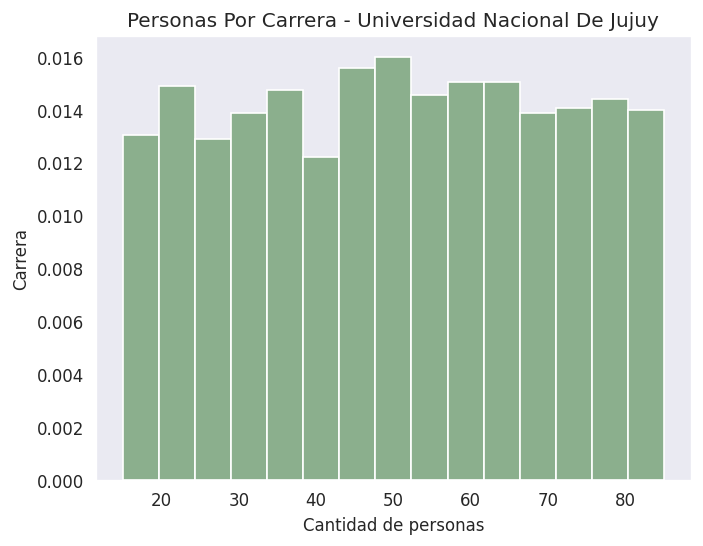

In [135]:
sns.histplot(df_1.age, color=colors_green[5],stat='density')
plt.title(f'Personas por carrera - {university1_name}'.title())
plt.xlabel('Cantidad de personas')
plt.ylabel('Carrera')

Text(0, 0.5, 'Cantidad')

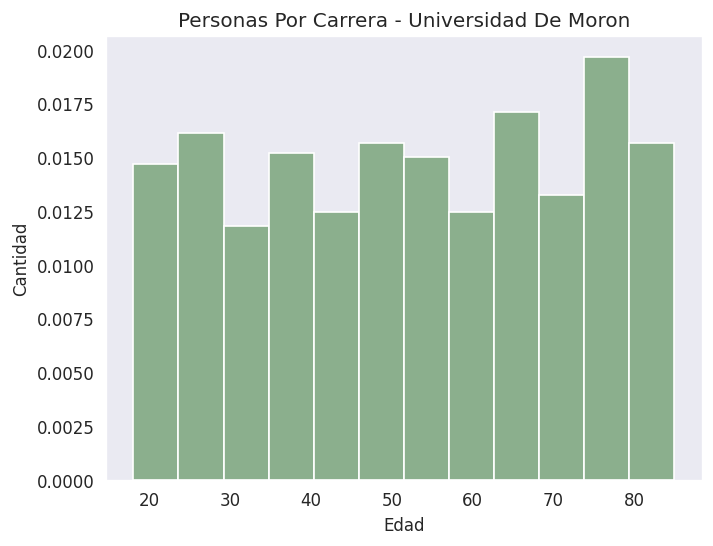

In [136]:
sns.histplot(df_2.age, color=colors_green[5],stat='density')
plt.title(f'Personas por carrera - {university2_name}'.title())
plt.xlabel('Edad')
plt.ylabel('Cantidad')

La distribución de las dedades para esta universidad parece tratarse de una distribución uniforme.

Las variables de este dataset extraido corresponde a las siguientes columnas:

- **'university'**: esta variable menciona la universidad en la que asiste el alumno
- **'career'**: carrera de la que es alumno
- **'inscription_date'**: fecha en la que se inscribio, 
- **'first_name'**: nombres
- **'last_name'**: apellido/s
- **'gender'**: género declarado
- **'age'**: edad en años
- **'postal_code'**: código postal
- **'location'**: localidad
- **'email'**: mail de contacto

In [137]:
df_geonames.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11
0,AR,3636,"POZO CERCADO (EL CHORRO (F), DPTO. RIVADAVIA (S))",Salta,A,NaN,NaN,NaN,NaN,-23.4933,-61.9267,3
1,AR,4123,LAS SALADAS,Salta,A,NaN,NaN,NaN,NaN,-25.7833,-64.5000,4


Este dataset externo trae datos para enriquecer el dataset original y aporta variables imporantes como la **region**, que en este caso hace referencia a la provincia.

In [138]:
df_geonames.dropna(axis=1, inplace=True)

Realizamos la combinacion de los datasets

In [139]:
df_geonames.columns = ['country','postal_code', 'location', 'region', 'type', 'lat', 'lon', 'type_2']

In [140]:
df_1geonames_merge = df_geonames.merge(df_1, on='postal_code', how='right')

In [141]:
df_1geonames_merge.head(2)

,country,postal_code,location_x,region,type,lat,lon,type_2,university,career,inscription_date,first_name,last_name,gender,age,location_y,email
0,AR,3370,IGUAZU,Misiones,N,-25.5991,-54.5736,4.0,universidad nacional de jujuy,técnico para bioterios,2020-07-05,timothy,davis,male,77,planchada banderita,bruceobrien@hotmail.com
1,AR,3370,PUERTO AGUIRRE,Misiones,N,-25.5991,-54.5736,4.0,universidad nacional de jujuy,técnico para bioterios,2020-07-05,timothy,davis,male,77,planchada banderita,bruceobrien@hotmail.com


In [142]:
df_2geonames_merge = df_geonames.merge(df_2, on='postal_code', how='right')
df_2geonames_merge.head(2)

,country,postal_code,location_x,region,type,lat,lon,type_2,university,career,inscription_date,first_name,last_name,gender,age,location_y,email
0,AR,3083,GRUTLY NORTE,Santa Fe,S,-31.2167,-61.10,4.0,universidad de morón,licenciatura en artes,2020-10-28,sandra,simpson,female,85,grutly,spencermurphy@hotmail.com
1,AR,3083,GRUTLY,Santa Fe,S,-31.2667,-61.05,4.0,universidad de morón,licenciatura en artes,2020-10-28,sandra,simpson,female,85,grutly,spencermurphy@hotmail.com


Podemos observar nuestro dataset expandido con los nuevos datos geográficos.

# Análisis exploratorío

Un primer paso para describir nuestro dataset es ver las carreras cursadas dentro de las universidades estudiadas

### Curriculas

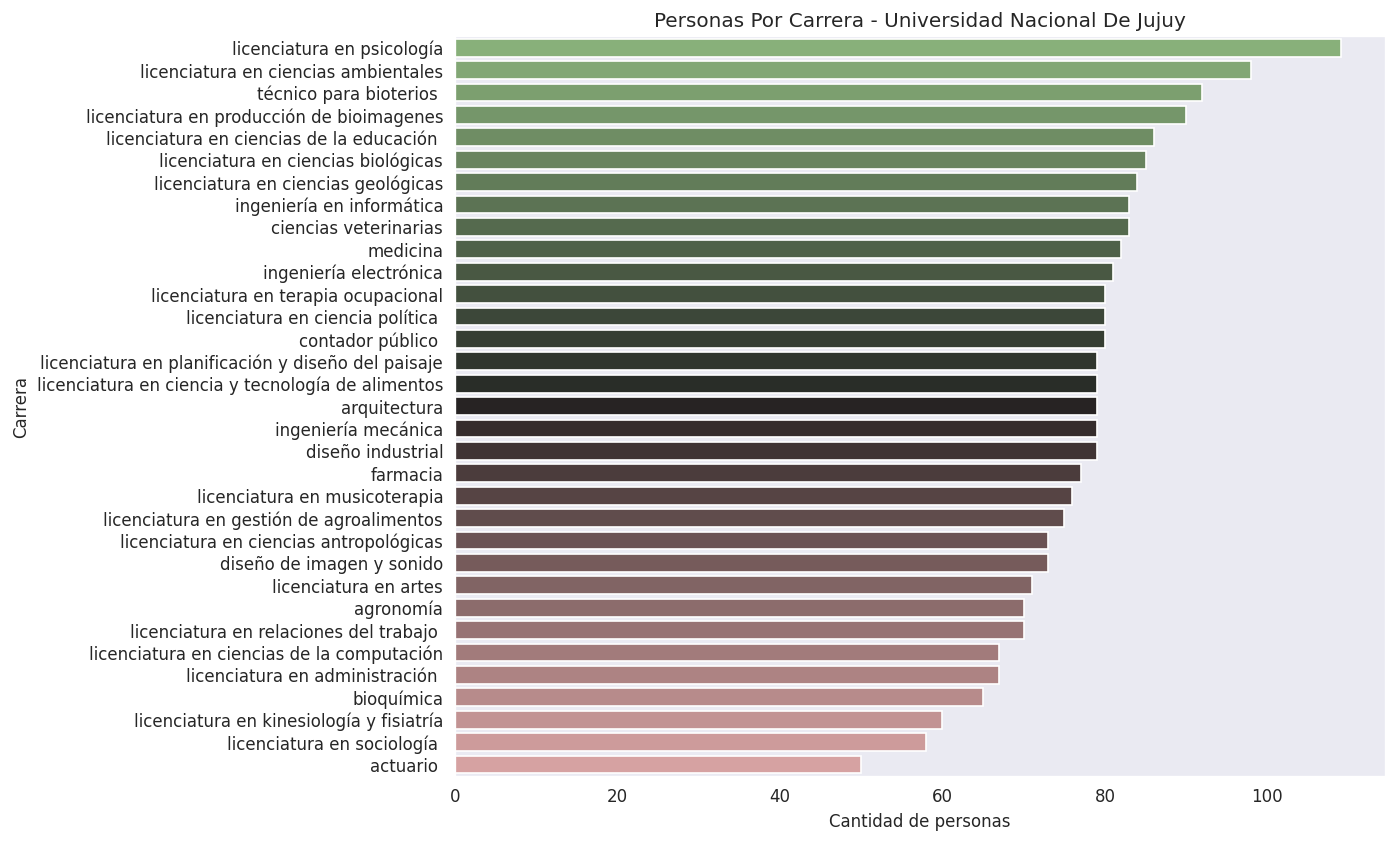

In [143]:
df_aux = df_1.groupby('career').count().reset_index().sort_values('university', ascending=False)
palette = sns.diverging_palette(120,12,s=55,l=70,n=33,center='dark')
plt.figure(figsize=(10, 8))
sns.barplot(data=df_aux, x='university', y='career', palette=palette)

plt.title(f'Personas por carrera - {university1_name}'.title())
plt.xlabel('Cantidad de personas')
plt.ylabel('Carrera')

plt.show()

En principio podémos observar que hay una diferencia entre la cantidad de personas que componen el alumnado, al observar el total de alumnos de cada carrera. Tambien se ve que la carrera mas concurrida tiene mucho mas alumnos. 

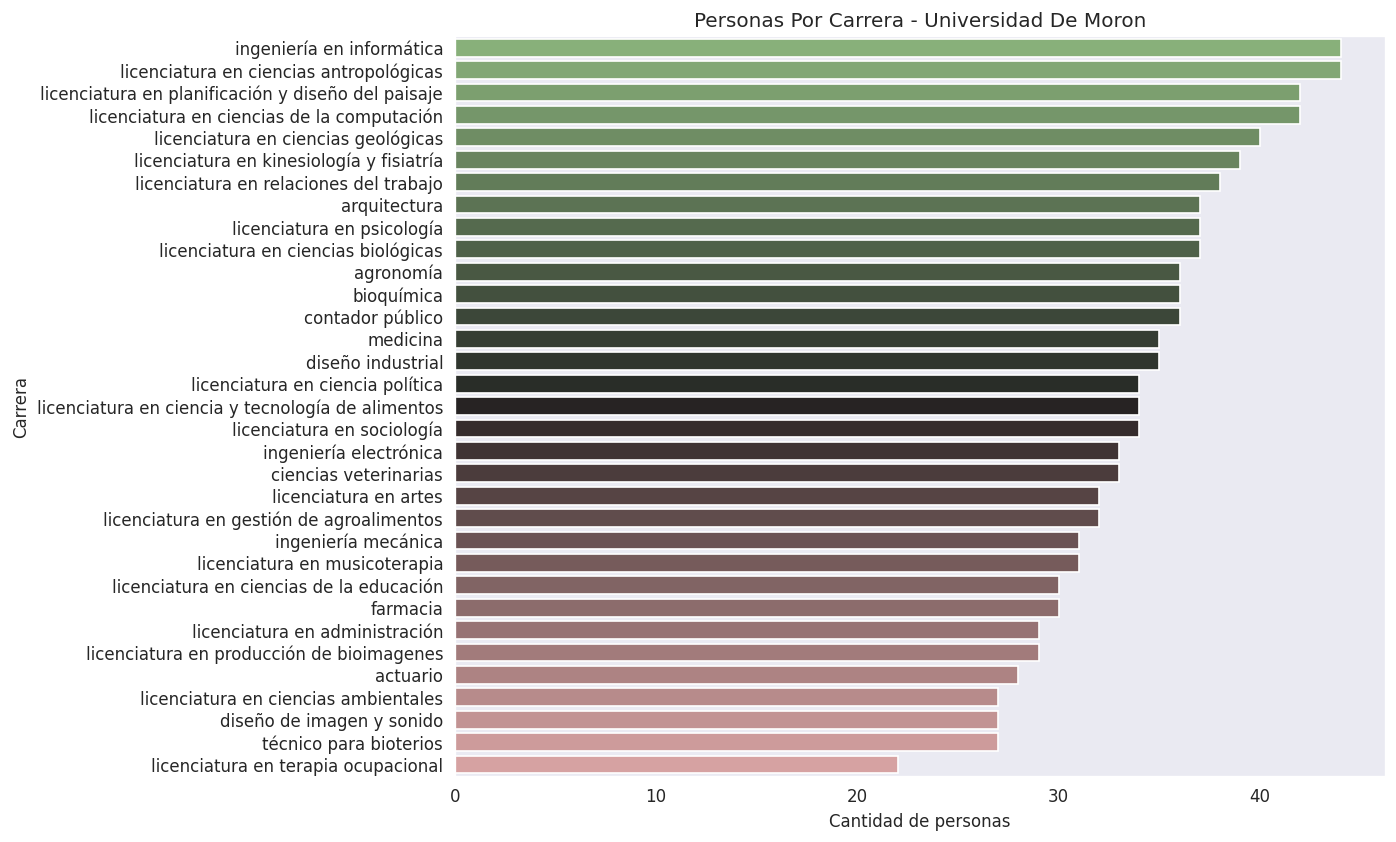

In [144]:
df_aux = df_2.groupby('career').count().reset_index().sort_values('university', ascending=False)
palette = sns.diverging_palette(120,12,s=55,l=70,n=33,center='dark')
plt.figure(figsize=(10, 8))
sns.barplot(data=df_aux, x='university', y='career', palette=palette)

plt.title(f'Personas por carrera - {university2_name}'.title())
plt.xlabel('Cantidad de personas')
plt.ylabel('Carrera')

plt.show()

Esto es algo que se repite en esta universidad, pero la cantidad de alumnos por carrera es menor y la diferencia parece ser más atenuada entre la carrera más concurrida con la menor concurrida.

## Detalle de la variable carrera

Para evaluar más en detalle la composición de alumnos para las diferentes carreras se propone observar las diez carreras con más alumnos de cada universidad y las 10 carreras con menos alumnos de cada universidad, para además comparar con la media de alumnos de toda la oferta académica.



### Universidad Nacional de Jujuy

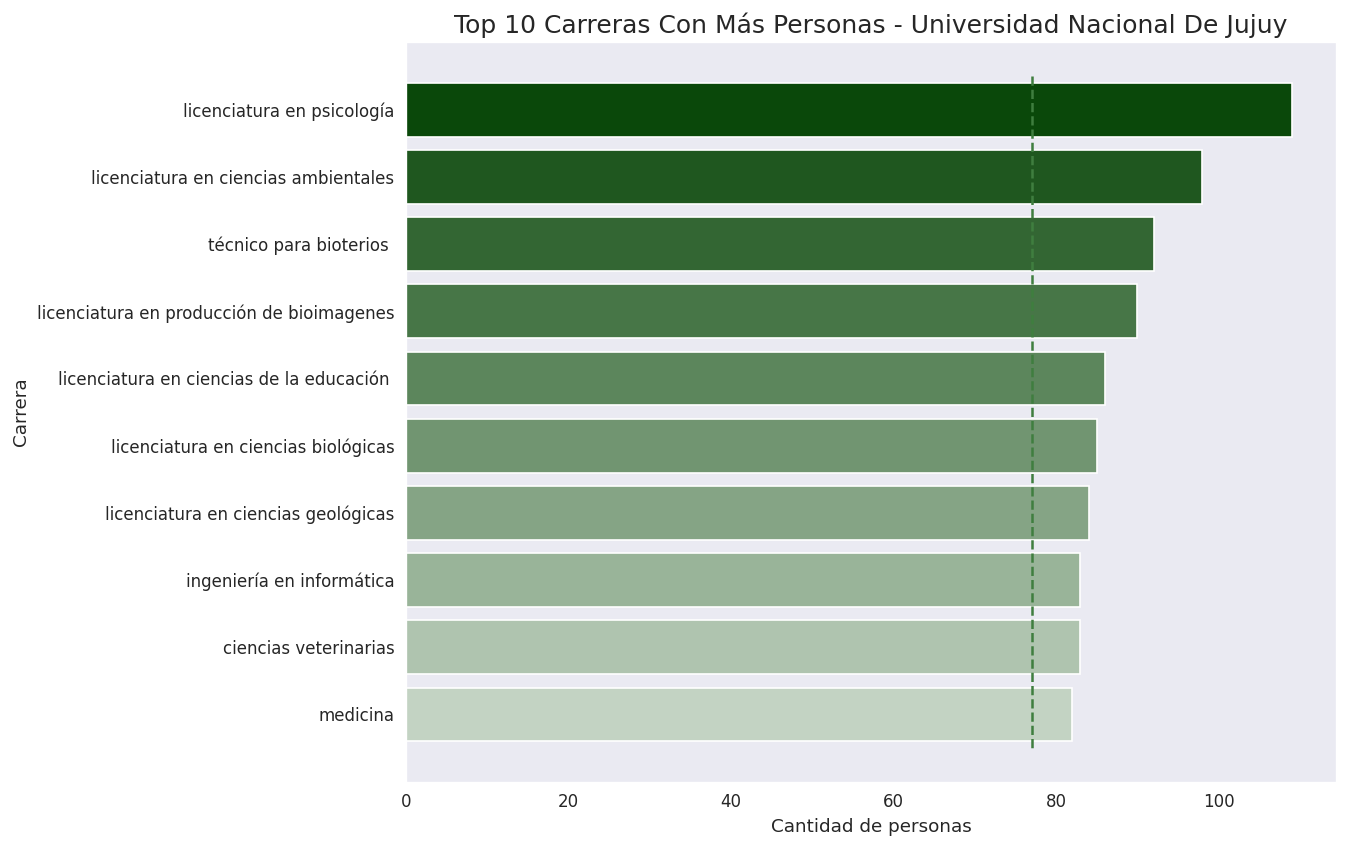

In [145]:
df_aux = df_1.groupby('career').count().reset_index().sort_values('university', ascending=False)
media_alumns_carrera = int(df_1.groupby('career').size().mean())

fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(data=df_aux.head(10), x='university', y='career', palette=colors_green, ax=ax)
ax.plot((media_alumns_carrera,media_alumns_carrera), (-0.5,9.5), color=colors_green[3],linestyle='dashed')
ax.set_title(f'Top 10 Carreras con más personas - {university1_name}'.title(),{'fontsize':15})
ax.set_xlabel('Cantidad de personas', {'fontsize':11})
ax.set_ylabel('Carrera', {'fontsize':11})

plt.show()

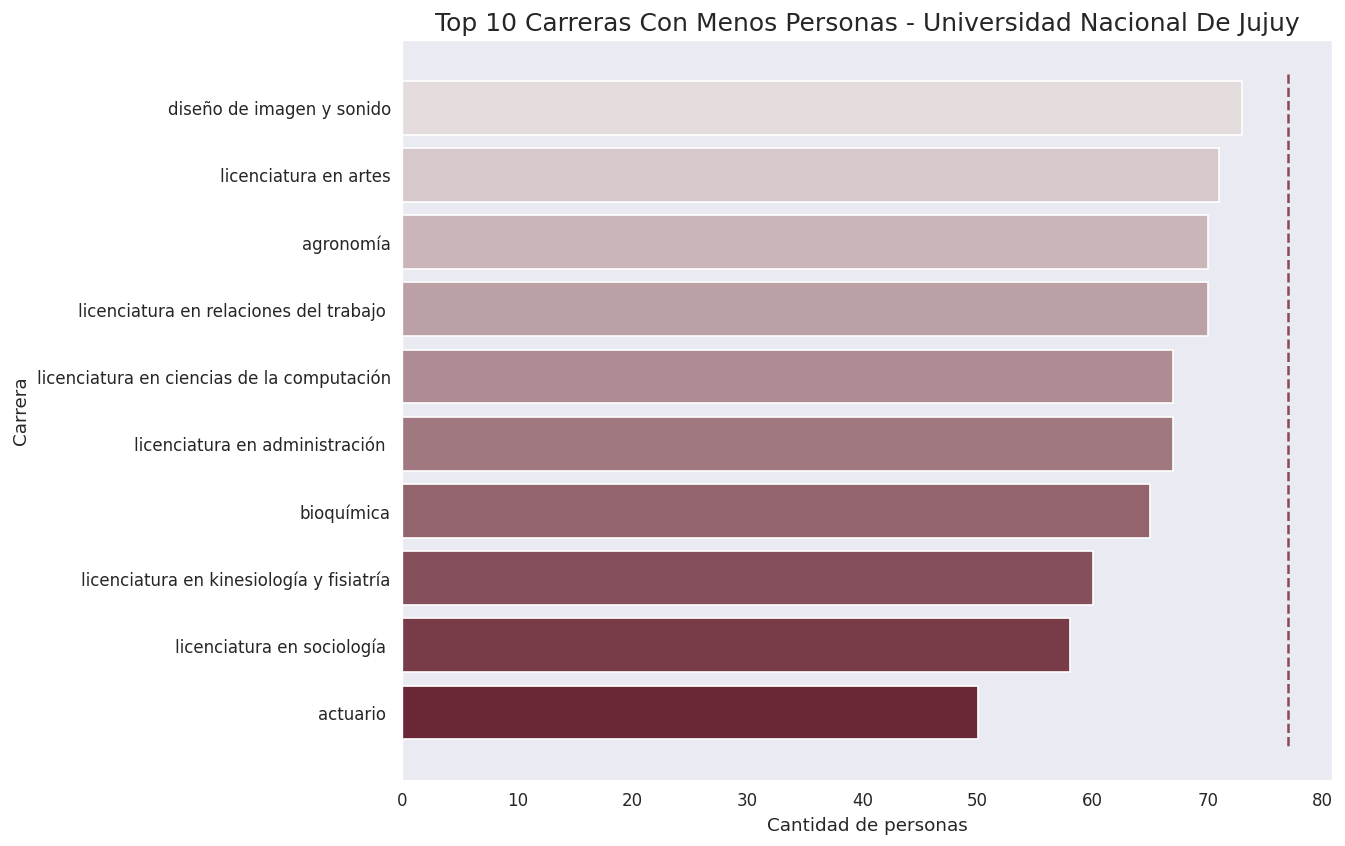

In [146]:
df_aux = df_1.groupby('career').count().reset_index().sort_values('university', ascending=False)
media_alumns_carrera = int(df_1.groupby('career').size().mean())

fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(data=df_aux.tail(10), x='university', y='career', palette=colors_red[10::-1], ax=ax)
ax.plot((media_alumns_carrera,media_alumns_carrera), (-0.5,9.5), color=colors_red[3],linestyle='dashed')
ax.set_title(f'Top 10 Carreras con menos personas - {university1_name}'.title(),{'fontsize':15})
ax.set_xlabel('Cantidad de personas', {'fontsize':11})
ax.set_ylabel('Carrera', {'fontsize':11})

plt.show()

Como se puede observar en este gráfico, estás 10 carreras son las que menor cantidad de alumnos presenta y que se mas  alejados de la media de todas las carreras que la de mayor concurrencia, vista como una línea punteada en el gráfico.

Text(0, 0.5, 'Cantidad de carreras')

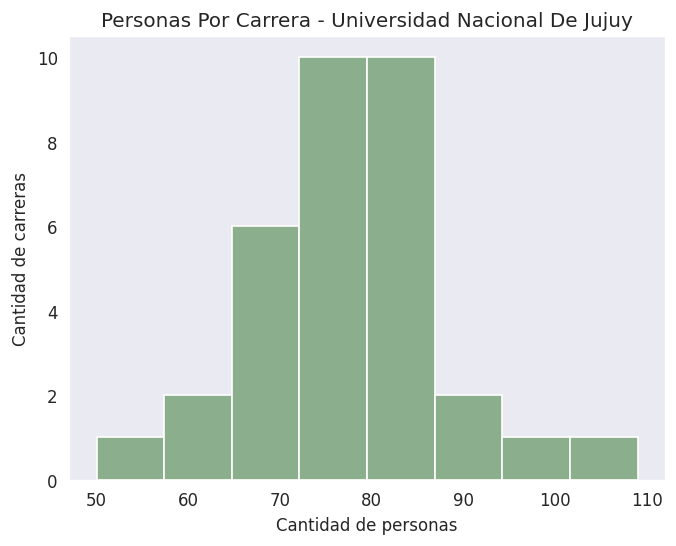

In [147]:
sns.histplot(df_1.career.value_counts(),bins=8, color=colors_green[5])
plt.title(f'Personas por carrera - {university1_name}'.title())
plt.xlabel('Cantidad de personas')
plt.ylabel('Cantidad de carreras')

In [148]:
#vemos los estadisticos de la distribucion de alumnos por carrera
df_1.career.value_counts().describe()

count     33.000000
mean      77.575758
std       11.313792
min       50.000000
25%       71.000000
50%       79.000000
75%       83.000000
max      109.000000
Name: career, dtype: float64

Como podémos observar la distribución de alumnos por carrera tiene una media de 77 alumnos y parece que la mayoria de las carreras concentra un numero parecido a este, en este caso la mayoría de las carreras tienen al menos 79 alumnos.

### Universidad De Moron

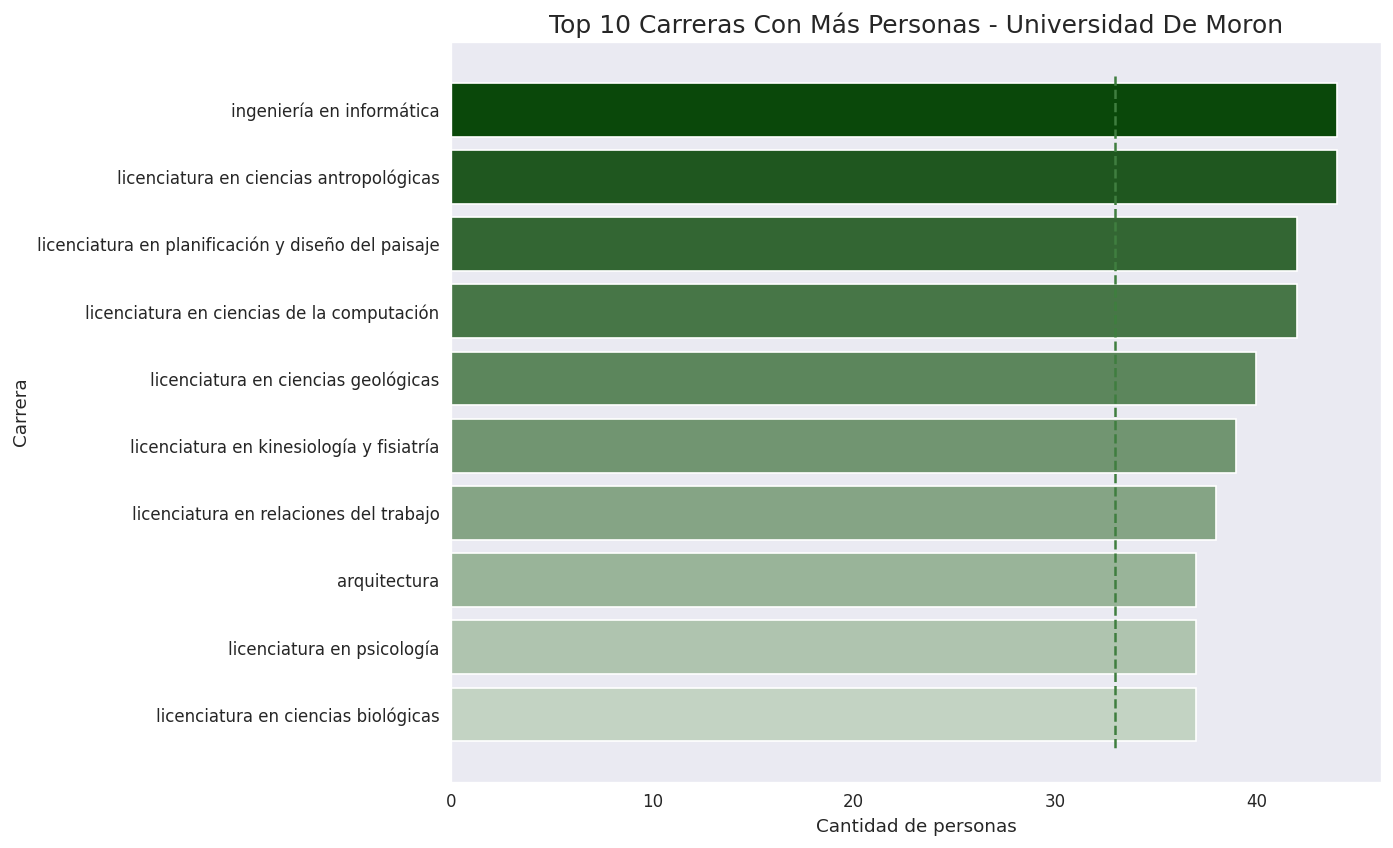

In [149]:
df_aux = df_2.groupby('career').count().reset_index().sort_values('university', ascending=False)
media_alumns_carrera = int(df_2.groupby('career').size().mean())

fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(data=df_aux.head(10), x='university', y='career', palette=colors_green, ax=ax)
ax.plot((media_alumns_carrera,media_alumns_carrera), (-0.5,9.5), color=colors_green[3],linestyle='dashed')
ax.set_title(f'Top 10 Carreras con más personas - {university2_name}'.title(),{'fontsize':15})
ax.set_xlabel('Cantidad de personas', {'fontsize':11})
ax.set_ylabel('Carrera', {'fontsize':11})

plt.show()

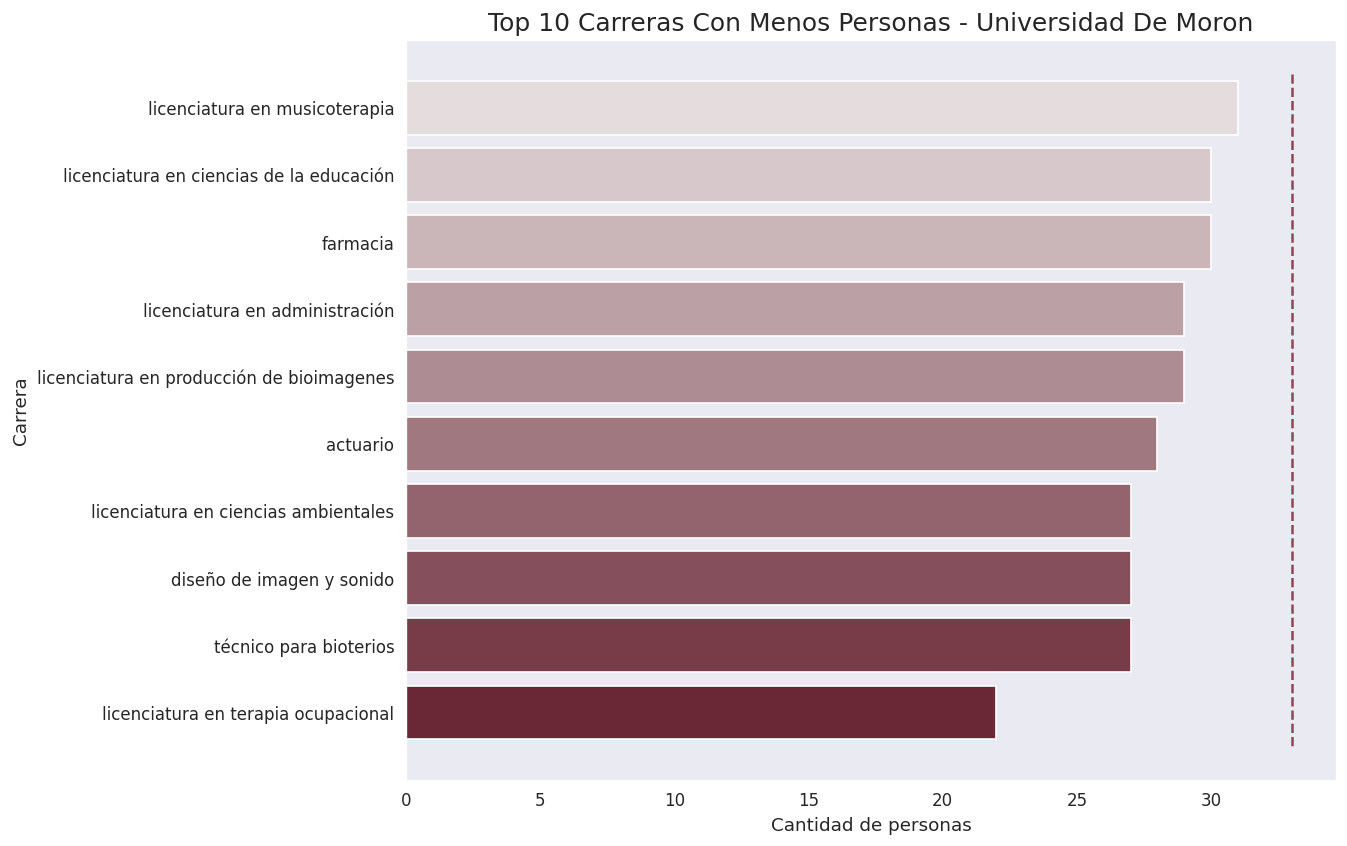

In [150]:
df_aux = df_2.groupby('career').count().reset_index().sort_values('university', ascending=False)
media_alumns_carrera = int(df_2.groupby('career').size().mean())

fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(data=df_aux.tail(10), x='university', y='career', palette=colors_red[10::-1], ax=ax)
ax.plot((media_alumns_carrera,media_alumns_carrera), (-0.5,9.5), color=colors_red[3],linestyle='dashed')
ax.set_title(f'Top 10 Carreras con menos personas - {university2_name}'.title(),{'fontsize':15})
ax.set_xlabel('Cantidad de personas', {'fontsize':11})
ax.set_ylabel('Carrera', {'fontsize':11})

plt.show()

Text(0, 0.5, 'Cantidad de carreras')

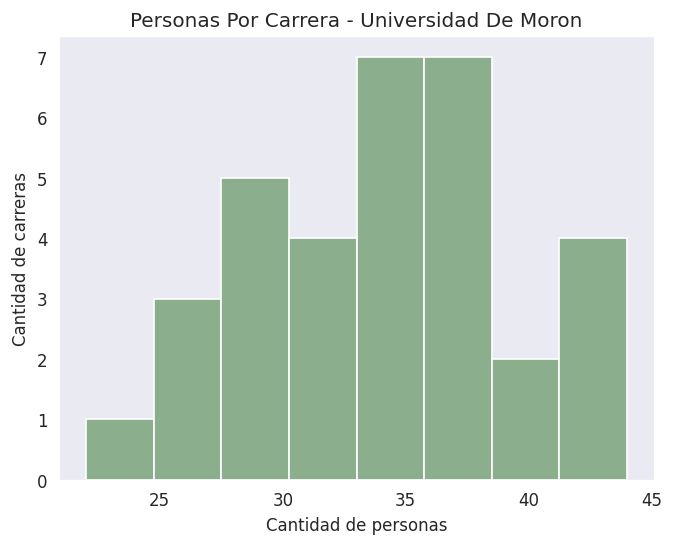

In [151]:
sns.histplot(df_2.career.value_counts(),bins=8, color=colors_green[5])
plt.title(f'Personas por carrera - {university2_name}'.title())
plt.xlabel('Cantidad de personas')
plt.ylabel('Cantidad de carreras')

In [152]:
#vemos los estadisticos de la distribucion de alumnos por carrera
df_2.career.value_counts().describe()

count    33.000000
mean     33.969697
std       5.252885
min      22.000000
25%      30.000000
50%      34.000000
75%      37.000000
max      44.000000
Name: career, dtype: float64

En este caso la media es de 33 alumnos por carrera, presentando un minímo de 22, pero la mayoría de las carreras tienen al menos 34 alumnos en esta universidad. Parece tratarse de una distribución normal de las edades.

### Análisis por género y edad - Universidad Nacional De Jujuy

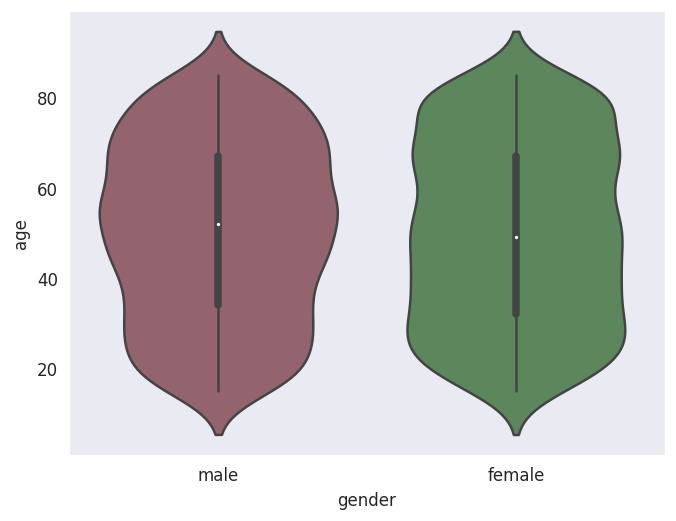

In [153]:
sns.violinplot(data=df_1,y='age', x='gender', palette=[colors_red[4], colors_green[4]])
plt.show()

Si observamos la distribución de la edad utilizando los diagrámas de violín categorízado por el género vemos que ambos poseen una distribución uniforme, con una alta dispersión, donde podemos observar una una trimodalidad ambos generos ubicado aproximadamente en los 20 años, los 50 años y los 70 años.

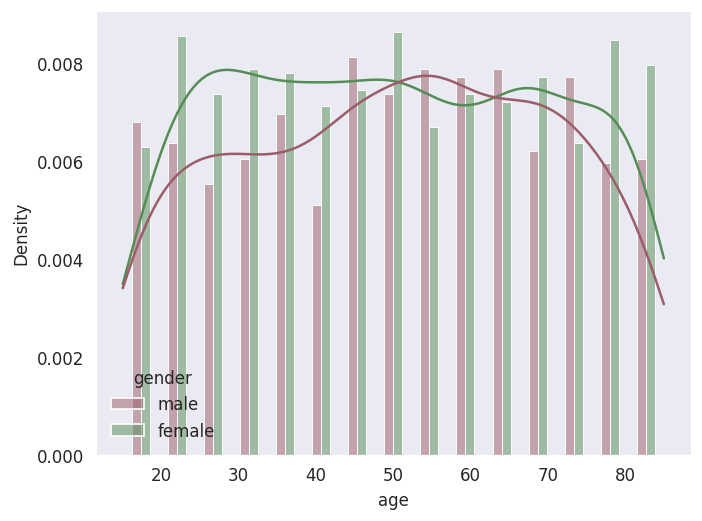

In [154]:
fig, ax = plt.subplots()
sns.histplot(data=df_1,
                x='age',
                hue='gender',
                kde=True,
                fill=True,
                multiple='dodge',
                shrink=.5,
                stat='density', 
                palette=[colors_red[4],
                colors_green[4]],
                ax=ax)
plt.show()
### top 10 localidades por alumnos

Otra forma de visualizar esto es a través de un gráfico de tipo histograma categorizado y sus respectivas curvas de densidad aproximada. En este caso podemos ver las 3 modas en la distribución de los varones y mujeres.

### Provincias - Universidad Nacional de Jujuy

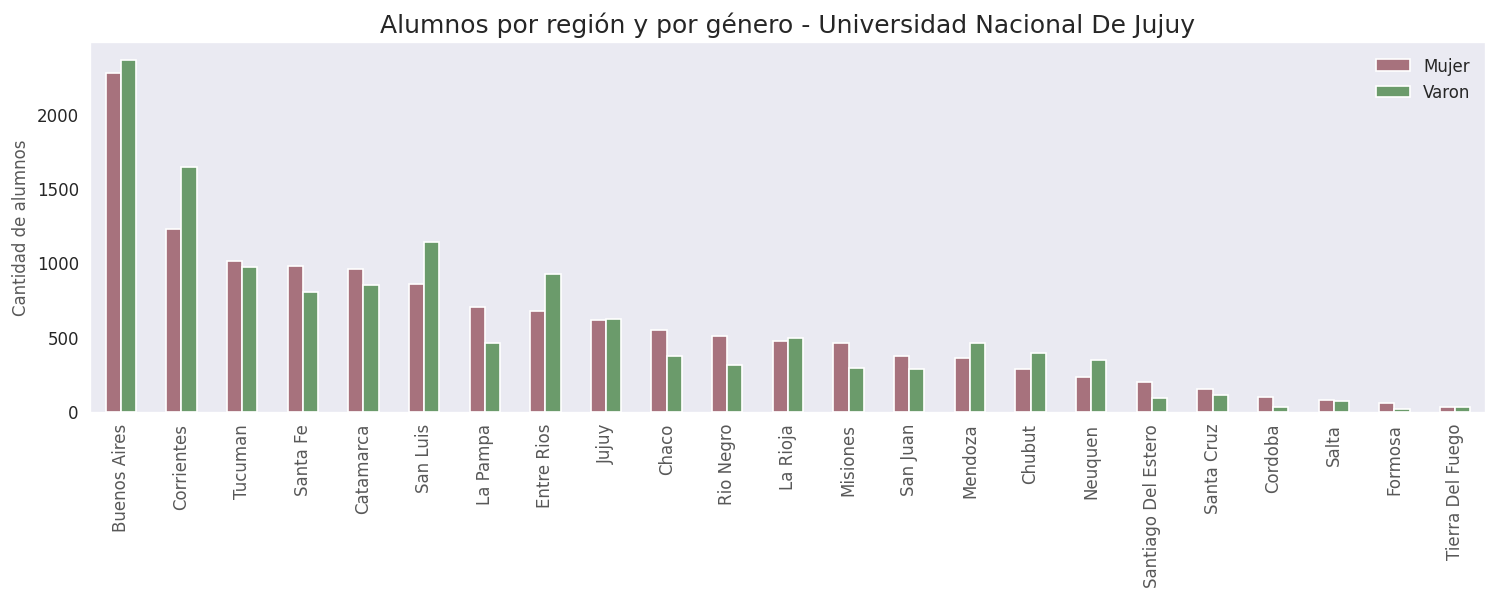

In [155]:
fig,ax=plt.subplots(figsize=(15,4))
df_aux = df_1geonames_merge.pivot_table(
    index=['region'],
    columns='gender',
    values=['first_name'],
    aggfunc={'region':'count'}
).sort_values(by=[('region','female')], ascending=False)

df_aux.plot(kind='bar',color=(colors_red[5],colors_green[5]),ax=ax)
ax.set_title(f'Alumnos por región y por género - {university1_name}',{'fontsize':15})
ax.set_ylabel('Cantidad de alumnos',{'color':colors_dark[3]})
ax.tick_params(axis='x', colors=colors_dark[3])
ax.set_xlabel('')
ax.legend(labels=['Mujer','Varon'])
plt.show()

En este gráfico de barras apareadas y ordenadas de forma descendente por género. Respecto a la distribución de alumnos por provincia podemos observar que la gran mayoría de los alumnos provienen de la Provincia de Buenos Aires y es destacable la diferencia entre géneros donde se hace mas destacada en la provincia de corriente, San luis y Entre Rios.

Text(0.5, 0, '')

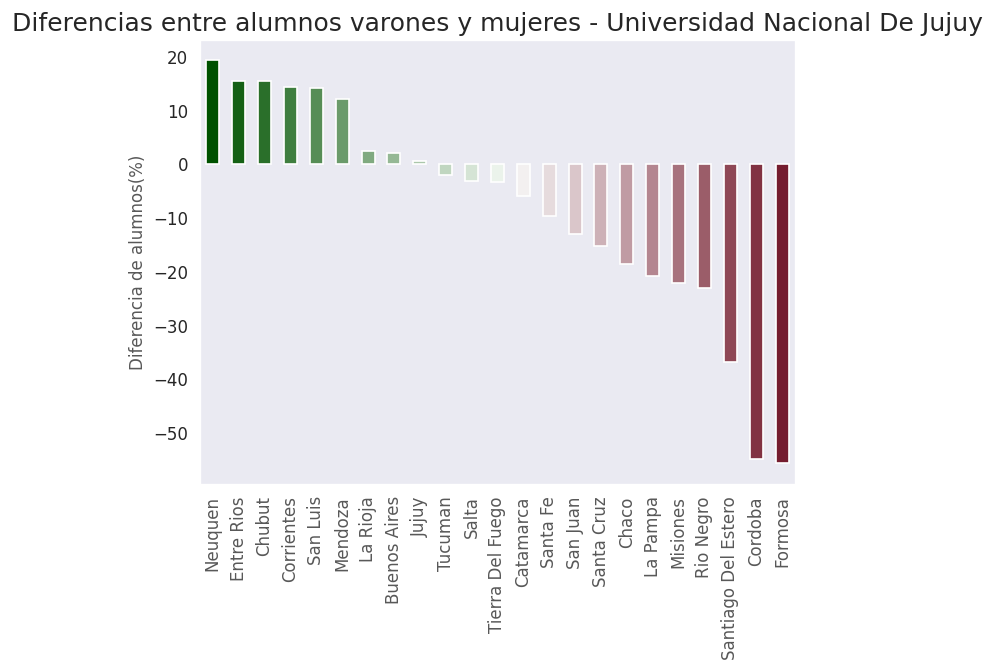

In [156]:
fig,ax = plt.subplots()

df_aux_2 = (df_aux.diff(axis=1)[(('region', 'male'))]) / df_aux.sum(axis=1) * 100

df_aux_2.sort_values(ascending=False).plot(kind='bar', x='region',ax=ax,color=colors_green+colors_red[::-1])

ax.set_title(f'Diferencias entre alumnos varones y mujeres - {university1_name}',{'fontsize':15})
ax.set_ylabel('Diferencia de alumnos(%)',{'color':colors_dark[3]})
ax.tick_params(axis='x', colors=colors_dark[3])
ax.set_xlabel('')

Con este gráfico podemos resumir como se ve la diferencia de alumnos para cada provincia en particular de forma porcentual. Neuquen es la que presenta mayor disparidad respecto a varones junto con Entre Rios. Respecto a disparidad de mujeres Santiago de Estero, Cordoba y Formoza son las que presentan mayor disparidad de alumnas provenientes de esas provincias.

### Localidades  - Universidad Nacional de Jujuy

In [157]:
df_1.location.value_counts().head(33)

bella vista             45
9 de julio              42
agua colorada           40
alto verde              36
25 de mayo              20
algarrobo               20
agua blanca             12
buena esperanza         10
algarrobal              10
avanzada                10
la lucila               10
acheral                 10
arroyo grande            9
albigasta                8
el jaguel                8
abra                     8
estancia las gamas       8
cataratas del iguazu     8
arbol solo               8
adolfo alsina            8
acostilla                8
las quintas              6
alegria                  6
castelar                 6
bealistock               6
buena vista              6
agua amarga              6
blas durañona            6
arroyo hondo             6
agua salada              6
alto del saladillo       6
el porvenir              6
aguirre cue              6
Name: location, dtype: int64

bella vista        45
9 de julio         42
agua colorada      40
alto verde         36
25 de mayo         20
algarrobo          20
agua blanca        12
buena esperanza    10
algarrobal         10
avanzada           10
Name: location, dtype: int64

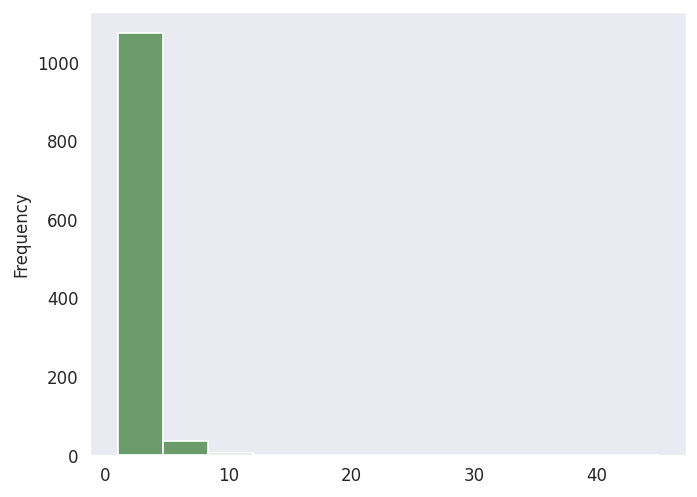

In [158]:
df_1.location.value_counts().plot(kind='hist', bins=12,color=colors_green[5])
df_1.location.value_counts().head(10)

Al parecer **hay pocas localidades que concentran la mayoria**  de alumnos a comparacion del resto siendo que a partir de la 7 localidad con mas alumnos ya solo aporta 10 alumnos cada 1.

### Análisis por género y edad - Universidad De Moron

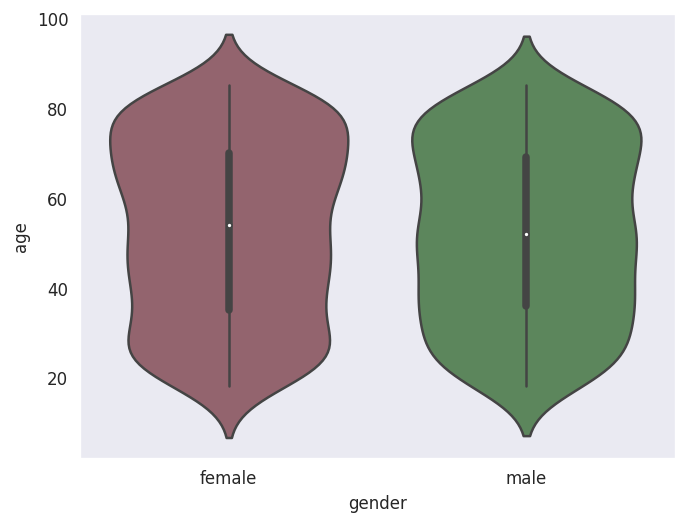

In [159]:
sns.violinplot(data=df_2,y='age', x='gender', palette=[colors_red[4], colors_green[4]])
plt.show()

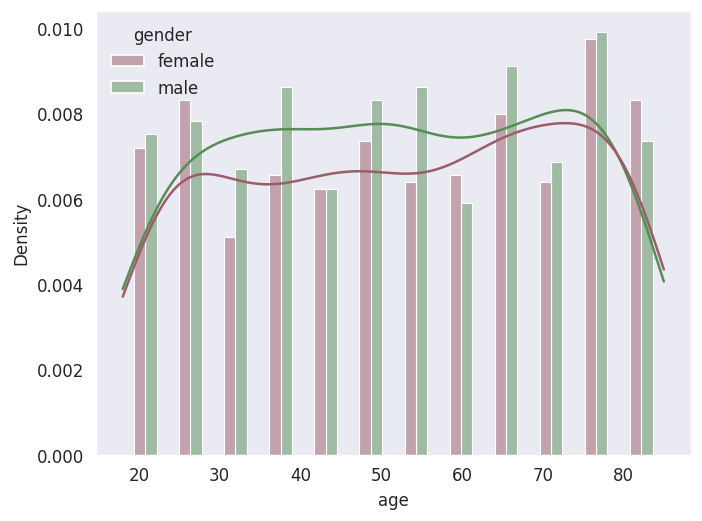

In [160]:
fig, ax = plt.subplots()
sns.histplot(data=df_2,
                x='age',
                hue='gender',
                kde=True,
                fill=True,
                multiple='dodge',
                shrink=.5,
                stat='density', 
                palette=[colors_red[4],
                colors_green[4]],
                ax=ax)
plt.show()
### top 10 localidades por alumnos

La distribución por edades parece ser dispersa entre todas las edades del espectro con un leve incremento para personas de 75 años.

### Provincias - Universidad de Moron

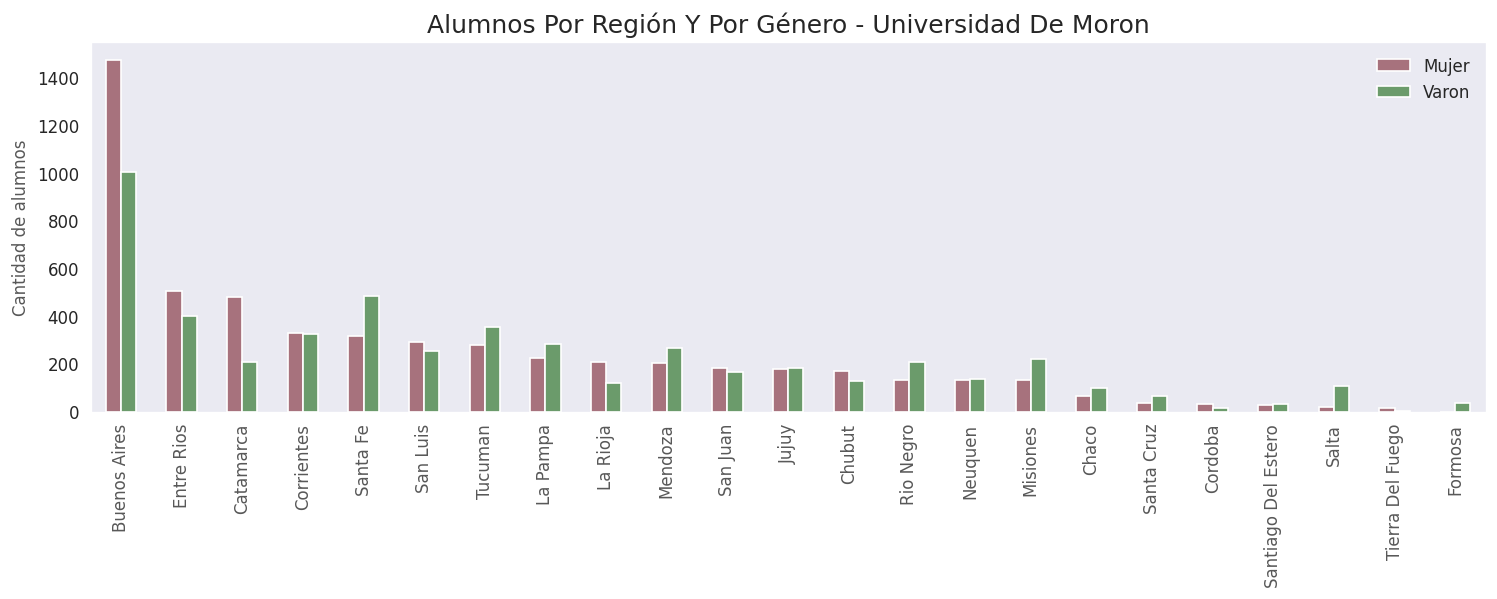

In [161]:
fig,ax=plt.subplots(figsize=(15,4))
df_aux = df_2geonames_merge.pivot_table(
    index=['region'],
    columns='gender',
    values=['first_name'],
    aggfunc={'region':'count'},
).sort_values(by=[('region','female')], ascending=False)

df_aux.plot(kind='bar',color=(colors_red[5],colors_green[5]),ax=ax)
ax.set_title(f'Alumnos por región y por género - {university2_name}'.title(),{'fontsize':15})
ax.set_ylabel('Cantidad de alumnos',{'color':colors_dark[3]})
ax.tick_params(axis='x', colors=colors_dark[3])
ax.set_xlabel('')
ax.legend(labels=['Mujer','Varon'])
plt.show()

Text(0.5, 0, '')

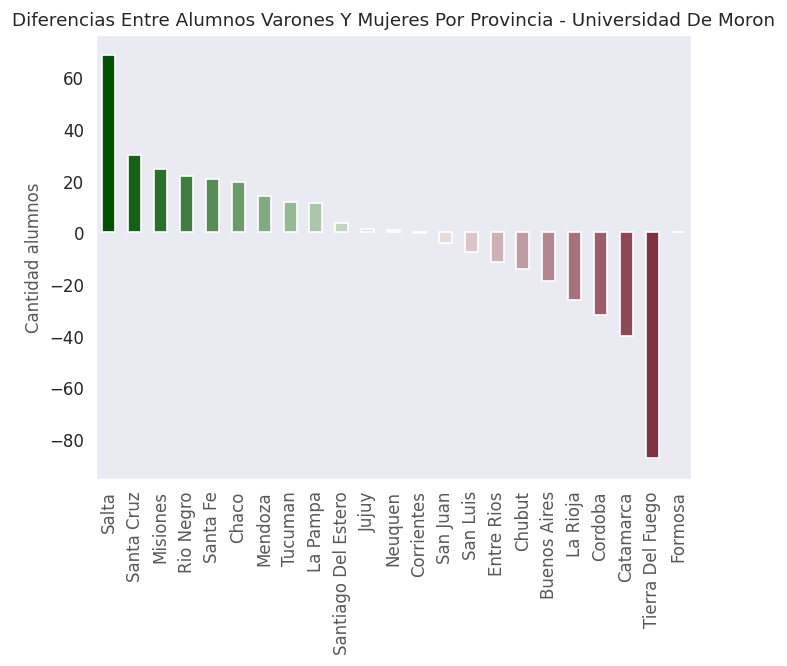

In [162]:
fig,ax = plt.subplots()

df_aux_2 = (df_aux.diff(axis=1)[(('region', 'male'))]) / df_aux.sum(axis=1) * 100

df_aux_2.sort_values(ascending=False).plot(kind='bar', x='region',ax=ax,color=colors_green+colors_red[::-1])

ax.set_title(f'Diferencias entre alumnos varones y mujeres por provincia - {university2_name}'.title(),{'fontsize':11})
ax.set_ylabel('Cantidad alumnos',{'color':colors_dark[3]})
ax.tick_params(axis='x', colors=colors_dark[3])
ax.set_xlabel('')

Como se puede ver Buenos Aires concentra una disparidad de alumnas a favor y siendo la provincia que mas personas aporta la cantidad de mujeres por sobre hombres es significativa, mientras que porcentualmente  las provincias con mas disparidad en mayoria hombres son Salta y Santa Cruz, y para el lado de las mujeres es Tierra del Fuego.

### Localidades - Universidad de Moron

In [163]:
df_2.location.value_counts().head(10)

alcorta              7
caraguatay           6
agua blanca          5
bella vista          5
aguas calientes      5
alto verde           5
adolfo alsina        5
buena vista          4
campo de villamil    4
agua colorada        4
Name: location, dtype: int64

alcorta              7
caraguatay           6
agua blanca          5
bella vista          5
aguas calientes      5
alto verde           5
adolfo alsina        5
buena vista          4
campo de villamil    4
agua colorada        4
colonia japonesa     4
alcaracito           4
alto lindo           4
los polvorines       4
17 de agosto         4
Name: location, dtype: int64

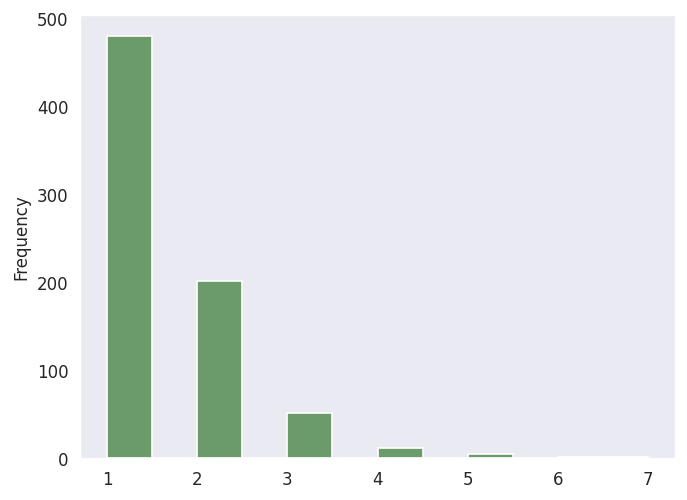

In [175]:
df_2.location.value_counts().plot(kind='hist', bins=12,color=colors_green[5])



Como se ve no hay localidades que concentre un gran numero de alumnos. Siendo que todas las localidades aportan un numero similar

### Segregación por tipo de carrera

In [165]:
def clasificador(x):
    
    clasificador ={
    'exactas_nat':['agronomía','licenciatura en ciencias biológicas','licenciatura en ciencias ambientales','licenciatura en ciencias biológicas', 'licenciatura en ciencias geológicas', 
    'técnico para bioterios', 'ingeniería electrónica', 'ingeniería en informática','ingeniería mecánica','licenciatura en ciencias de la computación'],
    'ciencias_salud':['ciencias veterinarias','farmacia','licenciatura en kinesiología y fisiatría','licenciatura en producción de bioimagenes','medicina','licenciatura en gestión de agroalimentos', 'licenciatura en ciencia y tecnología de alimentos','bioquímica'],
    'diseño_art':['diseño industrial', 'diseño de imagen y sonido', 'licenciatura en artes', 'licenciatura en musicoterapia', ],
    'empresarial':['actuario', 'contador público','licenciatura en administración'],
    'sociales':['licenciatura en ciencias antropológicas','licenciatura en ciencias de la educación','licenciatura en psicología', 'licenciatura en relaciones del trabajo','licenciatura en sociología','licenciatura en terapia ocupacional']
}
    if x in clasificador['exactas_nat']:
        return "Exactas y Naturales"
    elif x in clasificador['diseño_art']:
        return "Artes y Diseño"
    elif x in clasificador['empresarial']:
        return "Ciencias Empresariales"
    elif x in clasificador['ciencias_salud']:
        return "Salud"
    else:
        return "Sociales"
df_1['tipo_career'] = df_1.career.apply(clasificador)
df_2['tipo_career'] = df_2.career.apply(clasificador)

### Proporción de alumnos por tipo de carrera y género

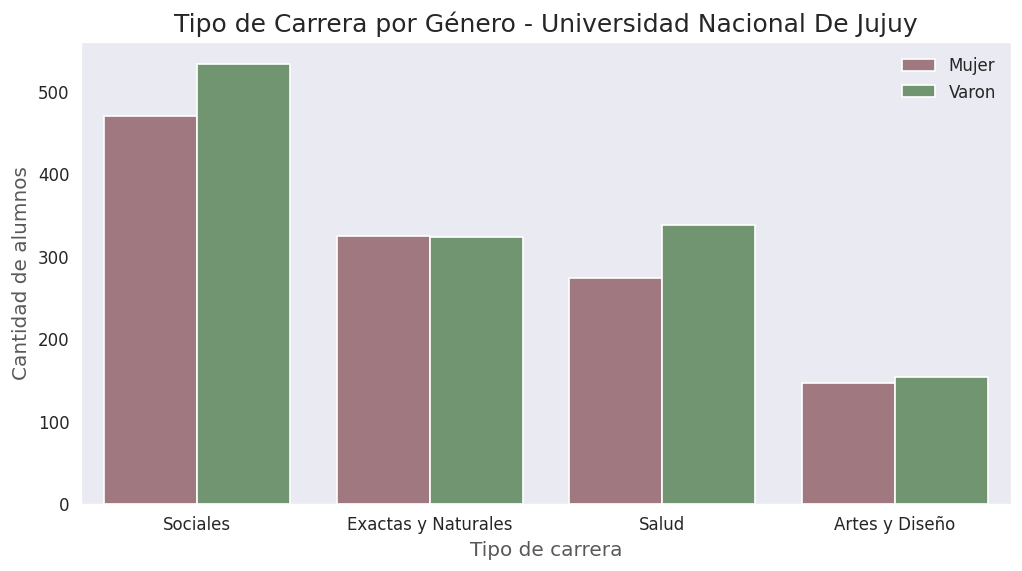

In [166]:
fig,ax = plt.subplots(figsize=(10,5))
g = sns.countplot(data=df_1,
                    x='tipo_career',
                    hue='gender',
                    palette=[colors_red[5],
                    colors_green[5]],
                    ax=ax)

g.set_title(f'Tipo de Carrera por Género - {university1_name}',{'fontsize':15})
g.set_ylabel('Cantidad de alumnos',{'fontsize':12,'color':colors_dark[3]})
g.set_xlabel('Tipo de carrera',{'fontsize':12,'color':colors_dark[3]})
g.set_xticklabels(labels=g.get_xticklabels())
ax.legend(labels=['Mujer','Varon'])


En la UNJ parece haber cierta disparidad de varones frente a mujeres en todos los tipos de carreras aunque mayormente en salud 

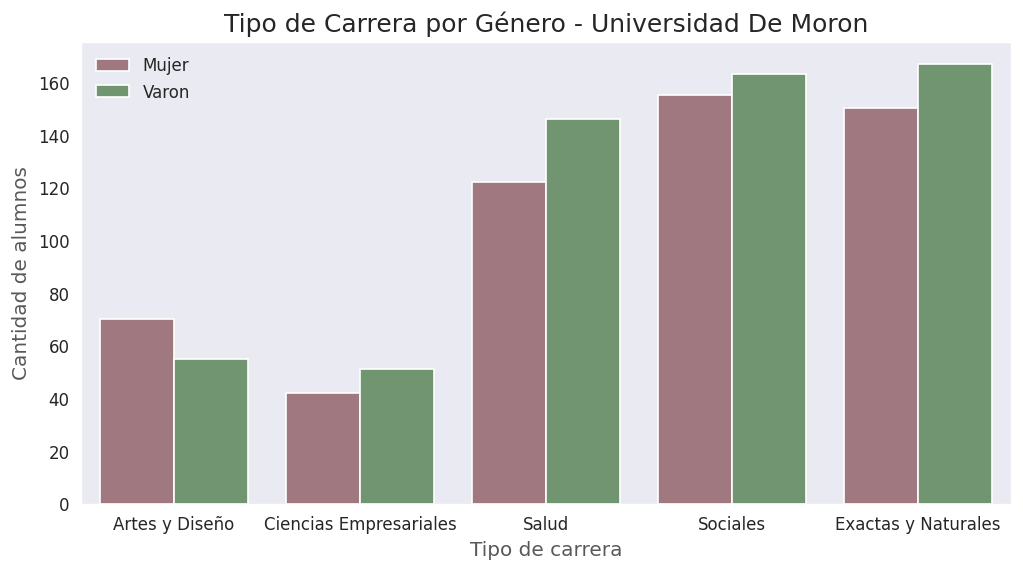

In [167]:
fig,ax = plt.subplots(figsize=(10,5))
g = sns.countplot(data=df_2,
                    x='tipo_career',
                    hue='gender',
                    palette=[colors_red[5],
                    colors_green[5]],
                    ax=ax)

g.set_title(f'Tipo de Carrera por Género - {university2_name}',{'fontsize':15})
g.set_ylabel('Cantidad de alumnos',{'fontsize':12,'color':colors_dark[3]})
g.set_xlabel('Tipo de carrera',{'fontsize':12,'color':colors_dark[3]})
g.set_xticklabels(labels=g.get_xticklabels())
ax.legend(labels=['Mujer','Varon'])

Por último si diferenciamos por tipo de carrera podemos ver que la disparidad de varones se en todas las areas excepto arte y diseño donde hay mayoria de mujeres

### Top Carreras por Proporción de Alumnas - Universidad Nacional De Jujuy

In [168]:
top_carreer_f = (df_1.groupby(['gender','career']).size() / df_1.groupby('career').size()).unstack().T.sort_values(by='female',ascending=False)
top_carreer_f.head()

gender,female,male
career,,
licenciatura en ciencias biológicas,0.658824,0.341176
licenciatura en ciencias antropológicas,0.643836,0.356164
licenciatura en relaciones del trabajo,0.614286,0.385714
arquitectura,0.582278,0.417722
licenciatura en ciencias de la computación,0.582090,0.417910


**Las mayoría de las carreras que más proporción tiene de mujeres corresponde a carreras relacionadas a biologia y antropologia.**

In [169]:
top_carreer_f = (df_1.groupby(['gender','career']).size() / df_1.groupby('career').size()).unstack().T.sort_values(by='female',ascending=False)
top_carreer_f.tail()

gender,female,male
career,,
licenciatura en ciencia política,0.462500,0.537500
licenciatura en musicoterapia,0.460526,0.539474
licenciatura en ciencias ambientales,0.459184,0.540816
ingeniería mecánica,0.417722,0.582278
licenciatura en ciencias geológicas,0.380952,0.619048


### Top Carreras por Proporción de Alumnas - Universidad De Moron

In [170]:
top_carreer_f_2 = (df_2.groupby(['gender','career']).size() / df_2.groupby('career').size()).unstack().T.sort_values(by='female',ascending=False)
top_carreer_f_2.head()

gender,female,male
career,,
licenciatura en ciencias antropológicas,0.613636,0.386364
licenciatura en musicoterapia,0.612903,0.387097
licenciatura en artes,0.593750,0.406250
licenciatura en ciencias ambientales,0.592593,0.407407
ingeniería mecánica,0.580645,0.419355


 las mas destacables podemos ver que son licenciatura en ciencias antropologicas y licenciatura en musicoterapia y licenciatura en artes

In [171]:
top_carreer_f_2 = (df_2.groupby(['gender','career']).size() / df_2.groupby('career').size()).unstack().T.sort_values(by='female',ascending=False)
top_carreer_f_2.tail()

gender,female,male
career,,
licenciatura en kinesiología y fisiatría,0.410256,0.589744
licenciatura en ciencias de la computación,0.380952,0.619048
licenciatura en administración,0.310345,0.689655
licenciatura en ciencias geológicas,0.300000,0.700000
medicina,0.171429,0.828571


Las carreras con menos porcentaje de mujeres en esta universidad corresponden a carreras agronomicas y biologicas.

### Algunos ejemplos

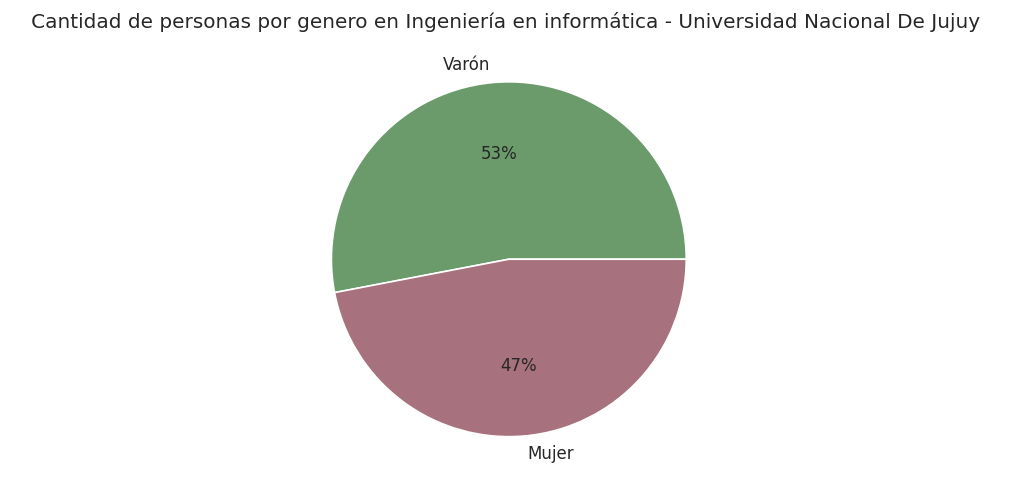

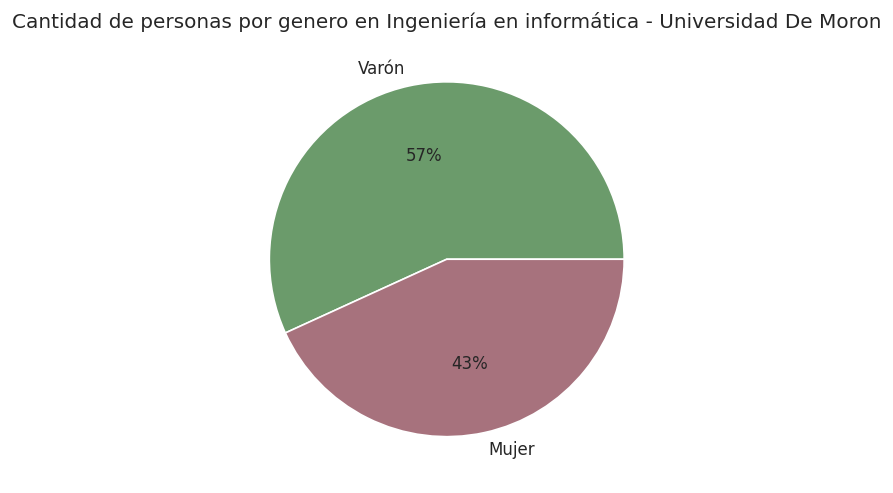

In [172]:
career = 'ingeniería en informática'

df_aux = df_1.query(f'career == "{career}"').gender.value_counts()

colors = sns.color_palette('pastel')
labels = ['Varón', 'Mujer']
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'   Cantidad de personas por genero en {career.capitalize()} - {university1_name}    ')
plt.show()

df_aux = df_2.query(f'career == "{career}"').gender.value_counts()
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'Cantidad de personas por genero en {career.capitalize()} - {university2_name}')
plt.show()


La carrera de informática suele tener el prejuicio de ser una carrera propia de varones, sin embargo, en estos dos casos podemos ver que hay una gran paridad entre la cantidad de hombres y de mujeres que la cursan.

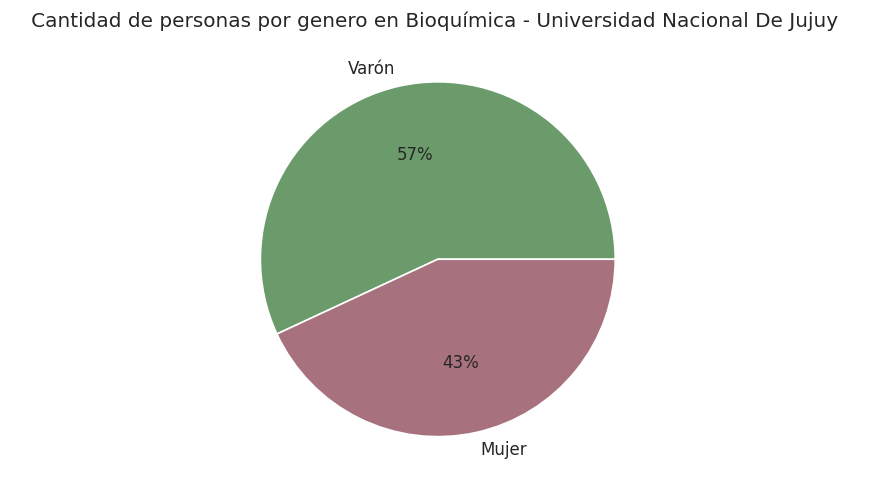

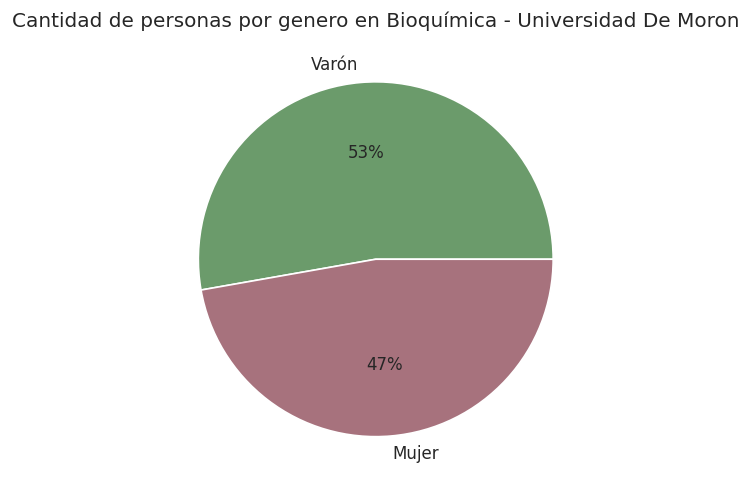

In [173]:
career = 'bioquímica'

df_aux = df_1.query(f'career == "{career}"').gender.value_counts()

colors = sns.color_palette('pastel')
labels = ['Varón', 'Mujer']
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'   Cantidad de personas por genero en {career.capitalize()} - {university1_name}    ')
plt.show()

df_aux = df_2.query(f'career == "{career}"').gender.value_counts()
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'Cantidad de personas por genero en {career.capitalize()} - {university2_name}')
plt.show()

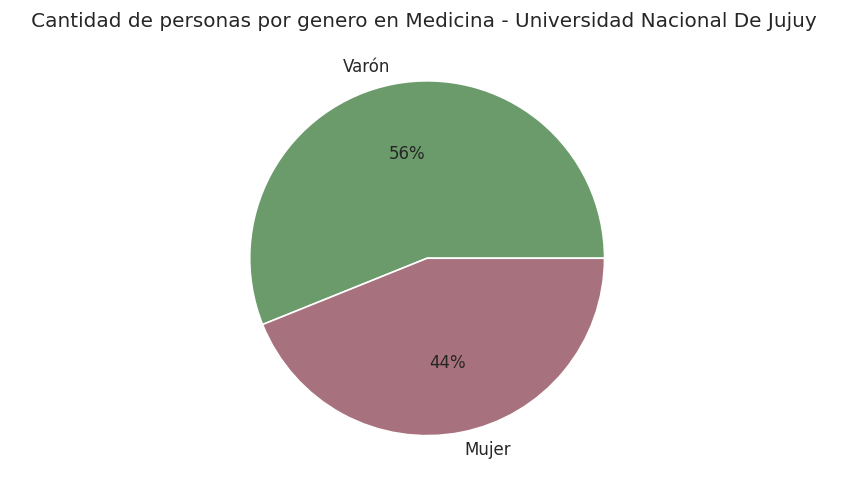

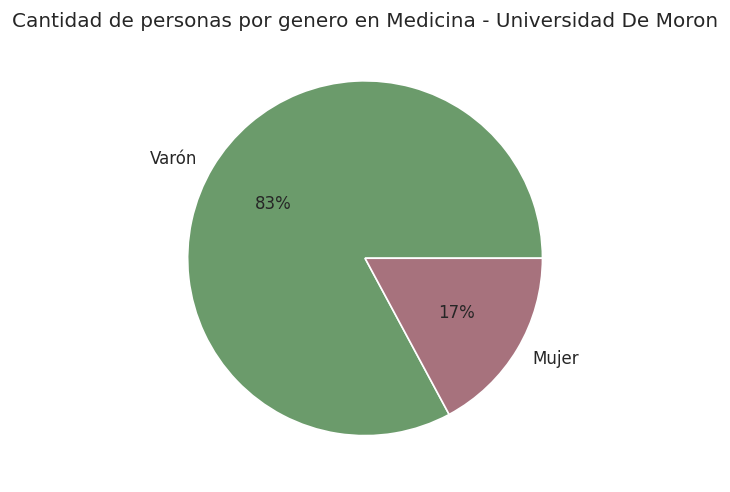

In [174]:
career = 'medicina'

df_aux = df_1.query(f'career == "{career}"').gender.value_counts()

colors = sns.color_palette('pastel')
labels = ['Varón', 'Mujer']
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'   Cantidad de personas por genero en {career.capitalize()} - {university1_name}    ')
plt.show()

df_aux = df_2.query(f'career == "{career}"').gender.value_counts()
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'Cantidad de personas por genero en {career.capitalize()} - {university2_name}')
plt.show()

Tanto en Bioquímica como en Medicina, dos carreras que suelen tener el prejuicio de tener más mujeres en ambas carreras para ambas universidades muestran una prevalencia de varones.

# Conclusiones

- Tanto la Universidad Nacional de Jujuy como la Universidad de Moron tienen una distribución uniforme, con lo cuál es importante remarcar que la cantidad de alumnos de todas las edades en edad de trabajo es alta y podría ser interesante la estimulación de turnos y comisiones nocturnas para no interferir con sus actividades.

- En la Universidad Nacional de Jujuy se ve que hay pocas localidades con gran concentracion de alumnos seria interesante una estimulacion a transporte publico entre localidades para que mas localidades tengan acceso a la educacion universitaria

- Tanto la Universidad Nacional de Jujuy como la Universidad de Moron tienen una gran disparidad en la cantidad de alumnas mujeres comparada con la de los hombres que llama la atención, ya que en algunas carreras popularmente consideradas de mayor cantidad de alumnos hombres como lo son computacion o mecanica podemos encontrar un porcentaje muy alto de alumnas.